In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import pdb
import json
from math import sqrt

In [15]:
file_csv = '/mnt/disk15tb/paula/Main_DA_Projects/data_analysis_output/Primary Neurons/KCNT1_T1_MAY6/ActivityScan_outputs/Compiled_ActivityScan.csv'

data_df = pd.read_csv(file_csv)

In [16]:
df = data_df.replace(np.NaN,0.0)
df

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,Mean_FiringRate,Mean_SpikeAmplitude,Active_area
0,37,6,1,HET cortex,14-Aug-2023 16:08:53,16378,1.617474,49.806838,23.469697
1,19,6,1,HET cortex,14-Aug-2023 13:27:25,16380,1.539986,49.557584,21.318182
2,23,6,1,HET cortex,14-Aug-2023 14:07:16,16465,1.738543,39.507751,13.803030
3,5,6,1,WT cortex,14-Aug-2023 11:41:56,16665,1.892748,53.782262,43.106061
4,41,6,1,WT cortex,14-Aug-2023 16:43:06,16666,2.573143,52.022512,41.954545
...,...,...,...,...,...,...,...,...,...
155,513,37,1,HET cortex,14-Sep-2023 18:10:28,18706,2.468135,108.939503,71.530303
156,504,37,1,HET cortex,14-Sep-2023 17:14:42,18832,3.715660,109.450943,85.818182
157,521,37,1,HET cortex,14-Sep-2023 19:00:04,19288,3.901490,119.347328,81.712121
158,500,37,1,HET cortex,14-Sep-2023 16:47:33,19375,2.289922,117.915158,84.287879


In [17]:
div = df['DIV'].unique()
print(div)


[ 6  9 14 17 21 24 28 37]


In [18]:
div = [17 ,21, 24, 28 ]

In [19]:
chip_id = df['Chip_ID'].unique()
print(chip_id)

[16378 16380 16465 16665 16666 16742 16792 16821 16850 16856 16867 16873
 16930 16963 18662 18706 18832 19288 19375 19380]


In [20]:
unique_genotypes = df['NeuronType'].unique()
unique_genotypes =['WT cortex','HET cortex']

In [21]:
chip_id_exclude = [16867,18662]
if chip_id_exclude:
    # Using list comprehension for filtering
    print("hello")
    mask = [((row.Chip_ID in chip_id_exclude)) for index, row in df.iterrows()]

    df = df[~pd.Series(mask)]

hello


In [22]:
chip_id = df['Chip_ID'].unique()
print(chip_id)

[16378 16380 16465 16665 16666 16742 16792 16821 16850 16856 16873 16930
 16963 18706 18832 19288 19375 19380]


#exclude chips

#maxtwo exclude
exclude_dict = {'M07295':3}

if exclude_dict:
    # Using list comprehension for filtering
    print("hello")
    mask = [(row.Type=='xx')or(row.Type=='yy') or ((row.Chip_ID in exclude_dict) and (row.Well == exclude_dict[row.Chip_ID])) for index, row in df.iterrows()]

    df = df[~pd.Series(mask)]

In [23]:
df.columns

Index(['Run_ID', 'DIV', 'Well', 'NeuronType', 'Time', 'Chip_ID',
       'Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area'],
      dtype='object')

In [24]:
colors = ['royalblue','indianred']
markers=['s','o']

Number of unique Genotypes: 2
[1.]


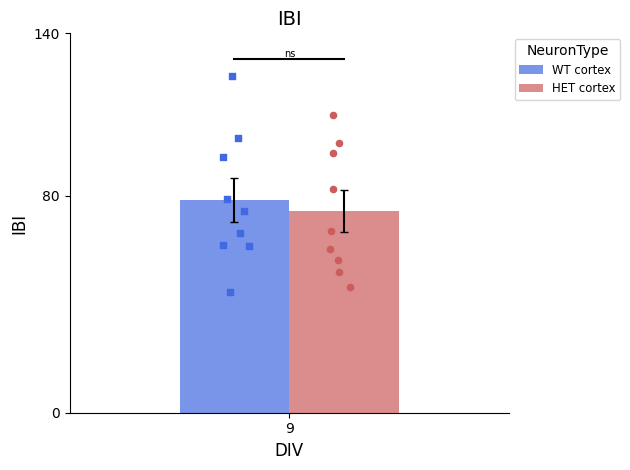

Number of unique Genotypes: 2
[1.]


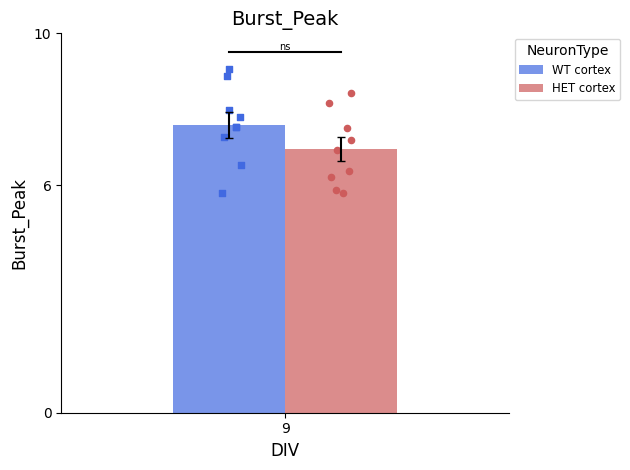

Number of unique Genotypes: 2
[1.]


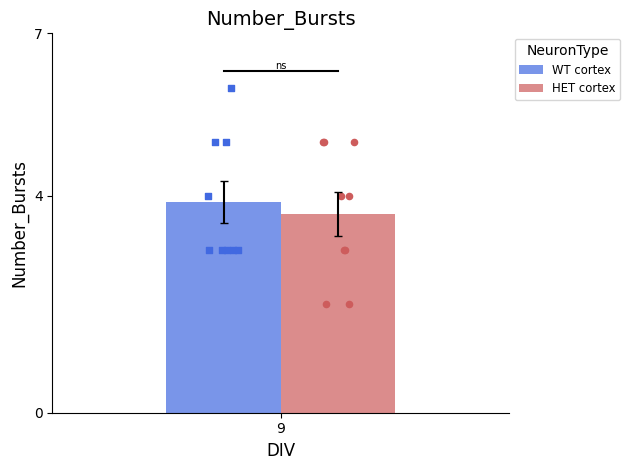

Number of unique Genotypes: 2
[1.]


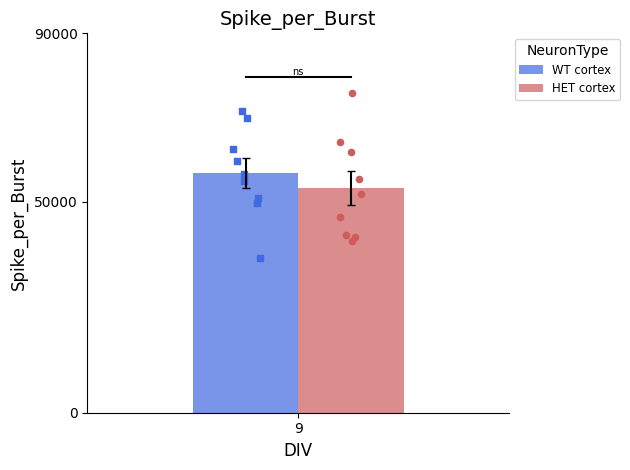

Number of unique Genotypes: 2
[1.]


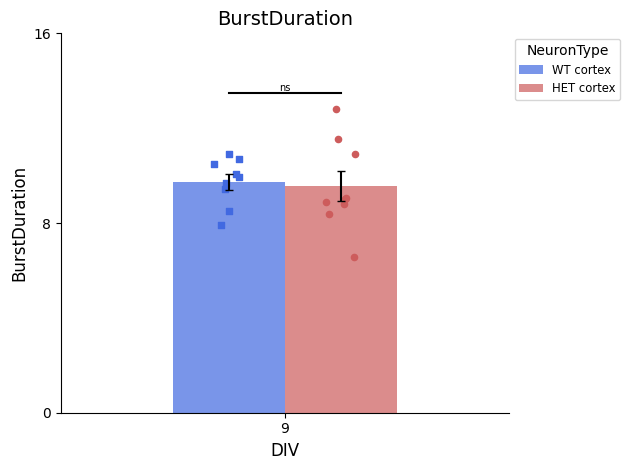

In [12]:
output_types = ['IBI',
       'Burst_Peak', 'Number_Bursts', 'Spike_per_Burst', 'BurstDuration',]
dirpath = '/home/mmp/Documents/KCNT1_GRANT_MAY2024/KCNT1_hyperbursts/'
div = [9]

for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    print(f"Number of unique Genotypes: {total_genotypes}")

    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) & (df['NeuronType'].str.strip() == genotype)]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    
    bar_width = 0.5  # Slimmer bar width
    gap_between_bars = 0.0  # Small gap between bars within a group
    gap_between_groups = bar_width  # Gap between groups of bars

    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars
    total_plot_width = len(div) * (total_bar_group_width + gap_between_groups) + gap_between_groups

    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div)) * (total_bar_group_width + gap_between_groups) + gap_between_groups + bar_width
    print(base_x_coordinate)
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + (i) * (bar_width + gap_between_bars)

    fig, ax = plt.subplots()
    mean_data_all = {}
    yerr_data_all = {}
    n_data_all = {}

    for i, (genotype, color, marker) in enumerate(zip(unique_genotypes, colors, markers)):
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1) / np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=color, label=genotype, alpha=0.7)

        jitter_amount = 0.07
        for j in range(len(x_genotype[genotype])):
            combined_data = [str(chip) + str(well) for chip, well in zip(chipy_data[j], welly_data[j])]
            for k in range(len(y_data[j])):
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=20,
                    color=color,
                    marker=marker
                )

    for i in range(len(base_x_coordinate)):
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    degreef = n1 + n2 - 2
                    alpha = 0.05
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([mean1, sem1, mean2, sem2, p_value])

                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    if sign != 'ns':
                        ax.plot([x1, x2], [maxim + 0.05 * maxim * (count)] * 2, 'k', linewidth=1.5)
                        #ax.text((x1 + x2) / 2, maxim + 0.05 * maxim * (count), f"{sign} ({round(p_value, 3)})", ha='center', va='bottom', fontsize=7)
                        ax.text((x1 + x2) / 2, maxim + 0.05 * maxim * (count), f"{sign}", ha='center', va='bottom', fontsize=7)
                        #ax.axvline(x1, color='black', linestyle=':', linewidth=0.5)
                        #ax.axvline(x2, color='black', linestyle=':', linewidth=0.5)
                    else:
                        ax.plot([x1, x2], [maxim + 0.05 * maxim * (count)] * 2, 'k', linewidth=1.5)
                        ax.text((x1 + x2) / 2, maxim + 0.05 * maxim * (count), f"{sign}", ha='center', va='bottom', fontsize=7)
                        #ax.axvline(x1, color='black', linestyle=':', linewidth=0.5)
                        #ax.axvline(x2, color='black', linestyle=':', linewidth=0.5)
                    count += 1
                    y_ticks = ax.get_yticks()
                    y_ticks_selected = [y_ticks[0], y_ticks[len(y_ticks) // 2], y_ticks[-1]]
                    ax.set_yticks(y_ticks_selected)
                    ax.spines['top'].set_visible(False)
                    ax.spines['right'].set_visible(False)
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()
    plt.xlim([0, total_plot_width])
    
    import os 
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.svg", dpi=300, format='svg')
    plt.savefig(f"{dirpath}/{output_type}.png", format='png')
    plt.show()

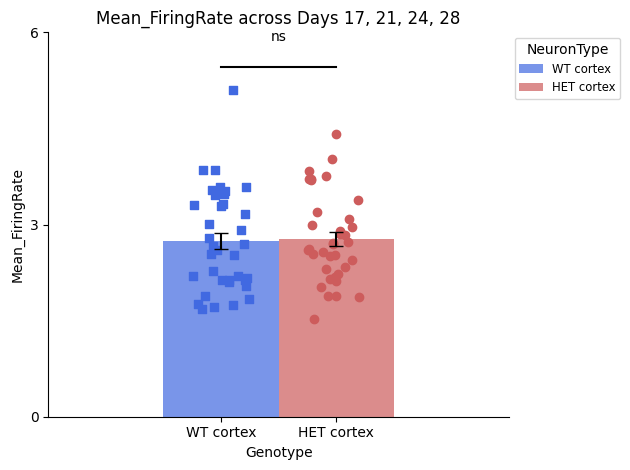

<Figure size 640x480 with 0 Axes>

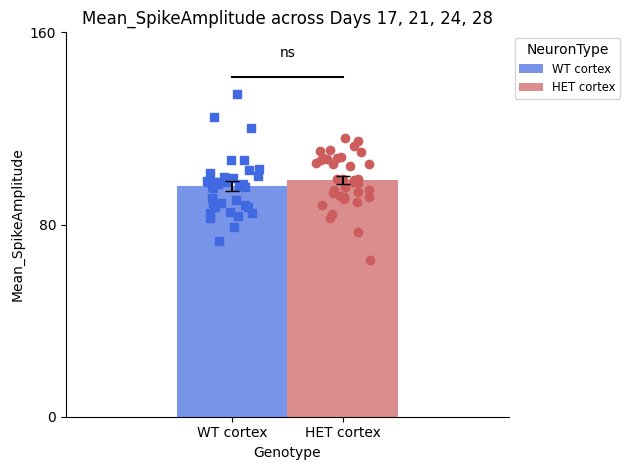

<Figure size 640x480 with 0 Axes>

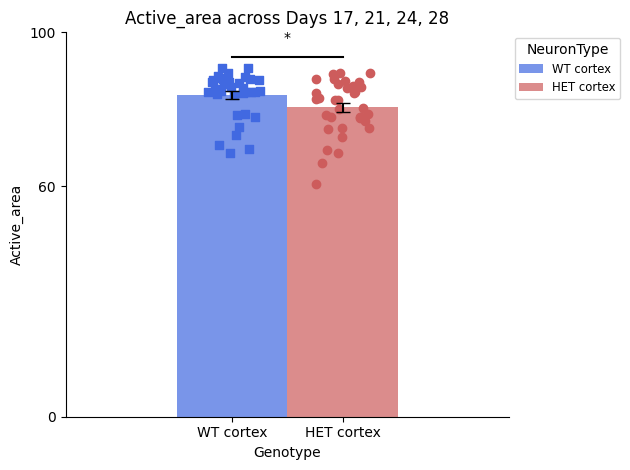

<Figure size 640x480 with 0 Axes>

In [39]:

div = [17, 21, 24, 28]  # Days to consider for analysis
output_types = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area']
dirpath = '/home/mmp/Documents/KCNT1_GRANT_MAY2024/KCNT1_T1_MAY6/'

# Create the directory if it does not exist
if not os.path.exists(dirpath):
    os.makedirs(dirpath)

# Process each output type separately
for output_type in output_types:
    fig, ax = plt.subplots()
    #colors = plt.cm.Set1(np.linspace(0, 1, len(unique_genotypes)))  # Color for each genotype
    #colors = ['lightblue','crimson']
    # Define bar width and centering parameters
    bar_width = 0.5  # Full width to ensure no gap
    base_x_position = 0.5 # Base x position for the first bar
    total_plot_width= len(unique_genotypes) * bar_width + bar_width

    data_summary = {}
    positions = []
    for i, genotype in enumerate(unique_genotypes):
        # Filter data for the specified days and genotype
        filtered_data = df[df['DIV'].isin(div) & (df['NeuronType'].str.strip() == genotype)]
        
        # Aggregate data across selected days
        aggregated_data = filtered_data[output_type].dropna()
        chips = filtered_data['Chip_ID'].dropna()
        
        # Calculate mean and SEM
        mean = np.mean(aggregated_data)
        SEM = np.std(aggregated_data) / sqrt(len(aggregated_data))
        
        # Store data for statistical comparison
        data_summary[genotype] = (mean, SEM, aggregated_data)
        
        # Calculate positions for bar and jitter
        x_position = base_x_position + i * bar_width # Small space between bars
        positions.append(x_position)
        
        # Plot a single bar for the genotype
        ax.bar(x_position, mean, yerr=SEM, width=bar_width, color=colors[i], label=f"{genotype}", capsize=5,alpha=0.7)
        
        # Add individual data points as scatter plot with chip-specific markers and jitter
        #markers = ['o', '^', '<', '>', 's', '*', 'p', 'H', 'X', 'D']
        chip_markers = {chip: markers[idx % len(markers)] for idx, chip in enumerate(np.unique(chips))}
        jitter = 0.25 * bar_width  # 10% of the bar width
        for chip, value in zip(chips, aggregated_data):
            jittered_x = x_position + np.random.uniform(-jitter, jitter)  # Apply jitter
            ax.scatter(jittered_x, value, marker=markers[i], color=colors[i])

    # Calculate and annotate statistical significance
    means = [data_summary[genotype][0] for genotype in unique_genotypes]
    SEMs = [data_summary[genotype][1] for genotype in unique_genotypes]
    combined_data = [data_summary[genotype][2] for genotype in unique_genotypes]

    # Perform t-test between genotypes
    t_stat, p_value = stats.ttest_ind(combined_data[0], combined_data[1], equal_var=False)
    max_y = max([max( combined_data[0] ),max(combined_data[1])]) # To position the significance marker
    min_y = min([min( combined_data[0] ),min(combined_data[1])]) # To position the significance marker
    # Horizontal line for p-value annotation
    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
    ax.plot(positions, [max_y + 0.1 * (max_y-min_y)] * 2, 'k-', lw=1.5)  # Horizontal line between the two bars
    ax.text(sum(positions) / 2, max_y + 0.2 * (max_y-min_y), f'{sign}', ha='center', va='bottom')
    y_ticks = ax.get_yticks()
    y_ticks_selected = [y_ticks[0], y_ticks[len(y_ticks) // 2], y_ticks[-1]]
    ax.set_yticks(y_ticks_selected)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Customize plot aesthetics
    plt.title(f"{output_type} across Days 17, 21, 24, 28")
    plt.xticks(positions, unique_genotypes)
    plt.xlabel('Genotype')
    plt.ylabel(output_type)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()
    plt.xlim([-0.25, total_plot_width+0.25])
    plt.savefig(f"{dirpath}/{output_type}_combined_div.svg", format='svg')
    plt.savefig(f"{dirpath}/{output_type}_combined_div.png", format='png')
    # Show and save the plot
    plt.show()

    plt.clf()
